In [201]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob as gb

In [202]:
dados = gb.glob ('dados/*.txt')

In [203]:
def nome_da_cidade (nome):
    data = open(nome, encoding = "UTF-8")
    x = data.readlines()
    coord = x [4] [1:]
    nomes = x [35].split(sep = ',')[0][18:] 

    
    return (coord, nomes)

In [204]:
c = nome_da_cidade ('./dados/0.80S-49.02W-TAVG-Trend.txt')
print (c)

('    0.80 S, 49.02 W\n', ' Belém')


In [205]:
c[0]

'    0.80 S, 49.02 W\n'

In [206]:
c[1]

' Belém'

In [207]:
for dado in dados[0:11]:
    first = nome_da_cidade (dado)
    print(first)

('    0.80 S, 49.02 W\n', ' Belém')
('    10.45 S, 48.27 W\n', ' Palmas')
('    13.66 S, 38.81 W\n', ' Salvador')
('    15.27 S, 47.50 W\n', ' Brasília')
('    2.41 S, 60.27 W\n', ' Manaus')
('    20.09 S, 44.36 W\n', ' Belo Horizonte')
('    20.09 S, 54.60 W\n', ' Campo Grande')
('    23.31 S, 42.82 W\n', ' Rio de Janeiro')
('    23.31 S, 46.31 W\n', ' São Paulo')
('    24.92 S, 49.66 W\n', ' Curitiba')
('    29.74 S, 51.69 W\n', ' Porto Alegre')


In [208]:
def temperaturas_estimada (estacao):
    data = open(estacao) 
    coluna = np.loadtxt(estacao, comments = '%')
    coluna_1 = np.nan_to_num (coluna[0:,4])
    x = data.readlines()
    y = x[47].split(sep = ' ')
    z = float (y[-3])
    a = np.ones(len(coluna_1))
    h = z*a 
    final = h + coluna_1
    
    
    return final

In [209]:
ac = temperaturas_estimada ('./dados/0.80S-49.02W-TAVG-Trend.txt')
print (ac)

[ 26.74   26.74   25.868 ...,  26.74   26.74   26.74 ]


In [210]:
for dado in dados[0:11]:
    soma_absoluta = temperaturas_estimada(dado)
    print (soma_absoluta)
    

[ 26.74   26.74   25.868 ...,  26.74   26.74   26.74 ]
[ 26.15   26.15   25.061 ...,  26.15   26.15   26.15 ]
[ 24.87   24.87   23.763 ...,  24.87   24.87   24.87 ]
[ 21.91   21.91   20.847 ...,  21.91   21.91   21.91 ]
[ 26.72  26.72  26.72 ...,  26.72  26.72  26.72]
[ 21.26   21.26   20.232 ...,  21.26   21.26   21.26 ]
[ 23.68   23.68   22.622 ...,  23.68   23.68   23.68 ]
[ 24.01   24.01   22.961 ...,  24.01   24.01   24.01 ]
[ 19.9    19.9    18.857 ...,  19.9    19.9    19.9  ]
[ 17.6    17.6    16.538 ...,  17.6    17.6    17.6  ]
[ 18.41   18.41   17.306 ...,  18.41   18.41   18.41 ]


In [220]:
def meses_e_anos_para_anos_decimais (local):
    coluna = np.loadtxt(local, comments = '%')
    anos = coluna[:,0]
    meses = coluna[:,1]
    anos_decimal = anos + 1/12 * (meses-1)
    return anos_decimal


In [221]:
def pratica_2_graficos_plotados (imagem):
    ano = meses_e_anos_para_anos_decimais(imagem)
    temp = temperaturas_estimada(imagem)
    
    
    
    plt.figure()
    plt.plot (ano,temp,'r-')
    plt.xlabel ('Anos')
    plt.ylabel ('Temperatura anual estimada(°C) ')
    plt.title (nome_da_cidade(imagem)[0])
    plt.savefig(nome_da_cidade(imagem)[1] +'.png')

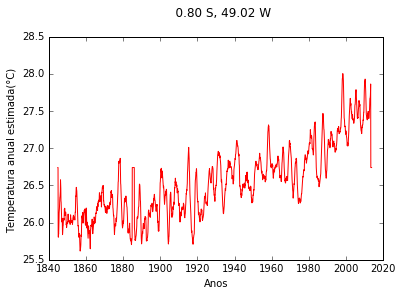

In [222]:
dados_ex_3 = ('./dados/0.80S-49.02W-TAVG-Trend.txt') 
h = pratica_2_graficos_plotados(dados_ex_3)

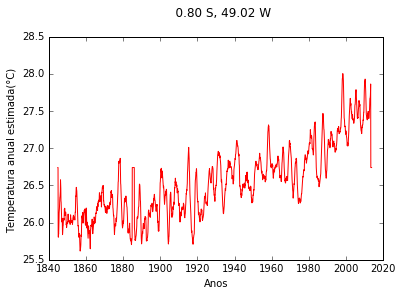

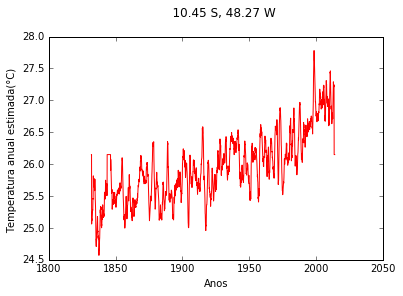

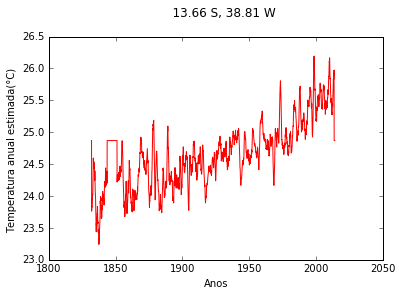

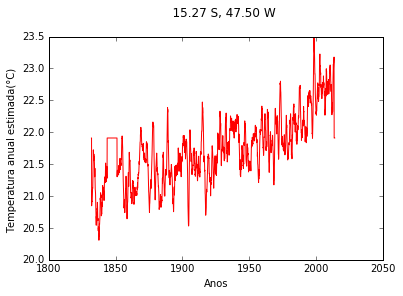

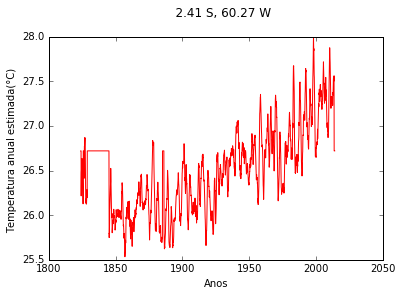

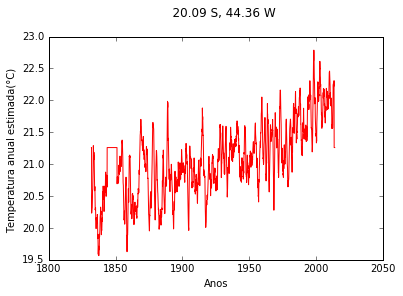

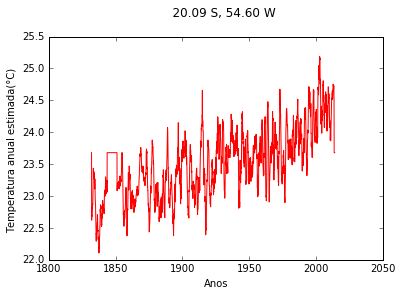

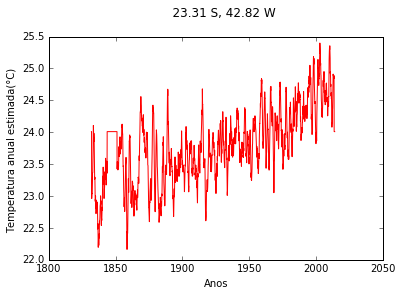

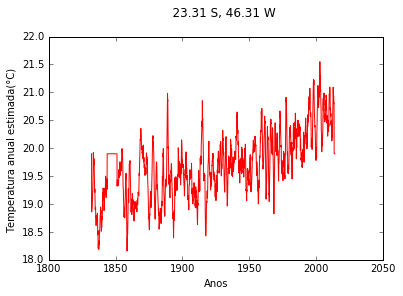

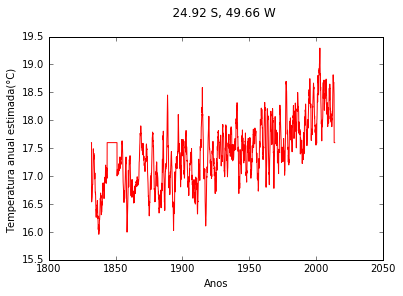

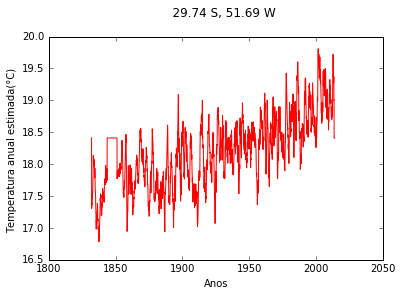

In [223]:
for dado in dados[0:11]:
    graficos = pratica_2_graficos_plotados (dado)